## k-MEANS CLUSTERING ALGORITHM

The k-means algorithm is a type of unsupervised learning algorithm (i.e. no label/category information associated with the images/feature vectors) that automatically forms clusters of similar “things”.

We call this algorithm k-means because it finds k unique clusters, where the center of each cluster (i.e. the “centroid”) is the mean of all values in the cluster.

The overall goal is to put similar data points in a cluster and dissimilar data points in a different cluster.

The k-means algorithm is used to find k clusters in a dataset, where the number of clusters k is a user supplied value.

Each cluster is represented by a single data point called the centroid.

The centroid is defined as the mean (average) of all data points belonging to the cluster and is thus simply the center of the cluster.

## Pseudo-code for k-means:

Step 1: Start off by selecting k random data points from your input dataset — these k random data points are your initial centroids.

Step 2: Assign each data point in the dataset to the nearest centroid. This requires computing the distance from each data point to each centroid (using a distance metric such as the Euclidean distance) and assigning the data point to the cluster with the smallest distance.

Step 3: Recalculate the position of all centroids by computing the average of all data points in the cluster.

Step 4: Repeat Steps 2 and 3 until all cluster assignments are stable (i.e. not flipping back and forth) or some stopping criterion has been met (such as a maximum number of iterations).

### Program:
Let’s actually apply k-means clustering algorithm to cluster shades of colors in an image. First, we will be presented with a canvas of blobs, where each blob is a shade of red, green, or blue. We’ll then apply k-means to cluster the red, green, and blue blobs together, separating them from each other.

In [ ]:
# import the necessary packages
# generate an image similar to above figure, so we can
# have something to cluster
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import numpy as np
import random
import cv2

In [ ]:
# initialize the list of color choices
colors = [
# shades of red, green, and blue
(138, 8, 8), (180, 4, 4), (223, 1, 1), (255, 0, 0), (250, 88, 88),
(8, 138, 8), (4, 180, 4), (1, 223, 1), (0, 255, 0), (46, 254, 46),
(11, 11, 97), (8, 8, 138), (4, 4, 180), (0, 0, 255), (46, 46, 254)]

In [ ]:
# initialize the canvas (White background)
canvas = np.ones((400, 600, 3), dtype="uint8") * 255

In [ ]:
# The actual process of drawing the random blobs is handled here
# loop over the canvas
# We start by looping over the entire image in 20 pixel increments.
for y in range(0, 400, 20):
	for x in range(0, 600, 20):
	# generate a random (x, y) coordinate, random radius for the blob, and random
    # color for the circle
	   (dX, dY) = np.random.randint(5, 10, size=(2,))
	   r = np.random.randint(5, 8)
	   # The color  list is represented in RGB order; we’ll reverse it to BGR order so
       # OpenCV can properly draw it.
	   color = random.choice(colors)[::-1]

	   # draw the circle on the canvas (completely filled)
	   cv2.circle(canvas, (x + dX, y + dY), r, color, -1)

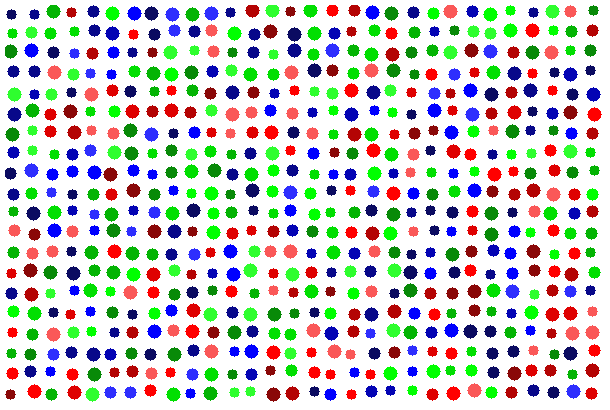

In [ ]:
# pad the border of the image
# adds a constant border of size 5 pixels to all four sides of your original image (t, b, l, r)
canvas = cv2.copyMakeBorder(canvas, 5, 5, 5, 5, cv2.BORDER_CONSTANT,value=(255, 255, 255))
cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

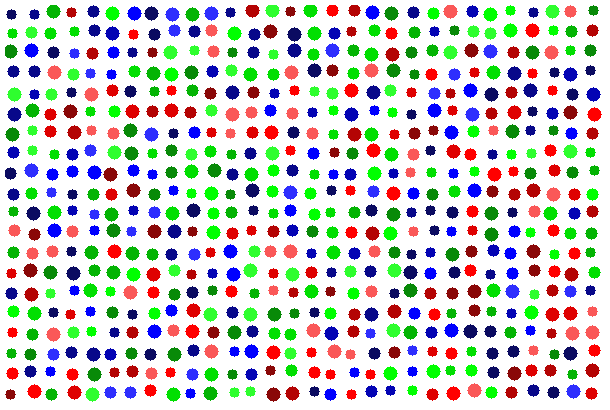

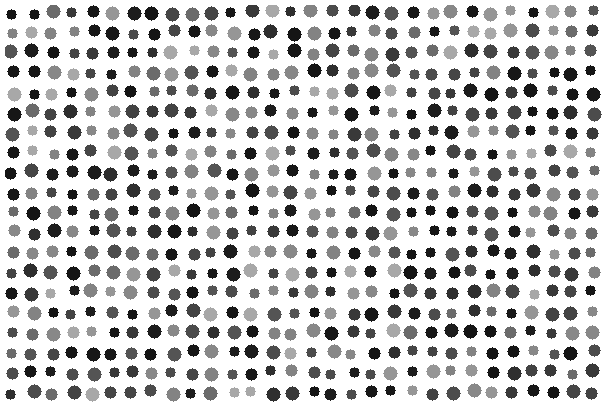

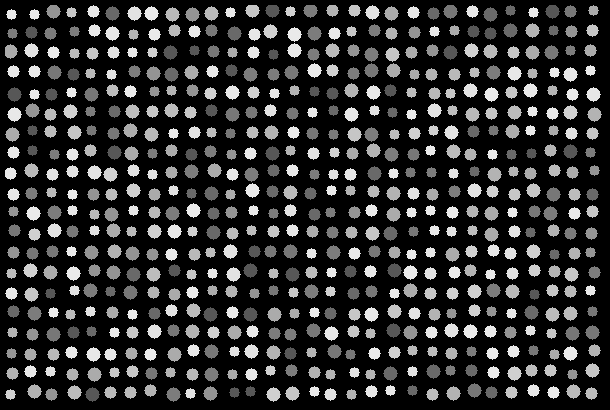

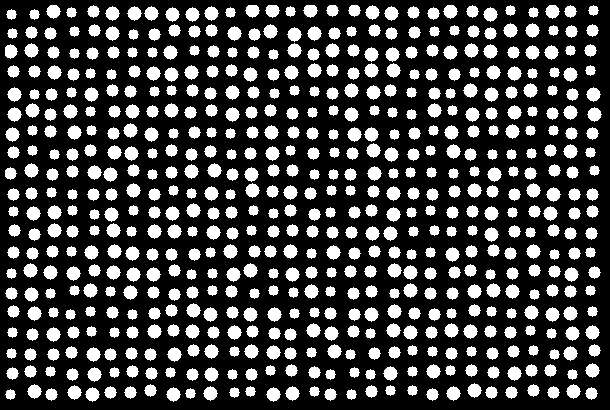

In [ ]:
# Now that we have our artificial image of blobs, we need to detect each one of them and
# extract color features to characterize each of them. Using thresholding, this is quite simple.
# convert the canvas to grayscale, threshold it, and detect contours in the image
gray = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
gray_n = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray_n, 10, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(canvas)
cv2_imshow(gray)
cv2_imshow(gray_n)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

(cnts, _) = cv2.findContours(gray_n.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# initialize the data matrix (which will store the features extracted from each of the blobs)
data = []

In [ ]:
# For each of the contours, we construct a mask  and extract the average RGB values — we’ll
# use these three averages to characterize the color of the circle.
# loop over the contours
for c in cnts:
	# construct a mask from the contour
	mask = np.zeros(canvas.shape[:2], dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)
	features = cv2.mean(canvas, mask=mask)[:3]
	data.append(features)

In [ ]:
# cluster the color features (No of clusters=3, one for each red, green, and blue shade, respectively)
# n_init = Number of times the k-means algorithm is run with different centroid seeds.
# The final results is the best output of n_init consecutive runs in terms of inertia.
# Several runs are recommended for sparse high-dimensional problems
clt = KMeans(n_clusters=3, n_init='auto')
clt.fit(data)

KMeans(n_clusters=3, n_init='auto')

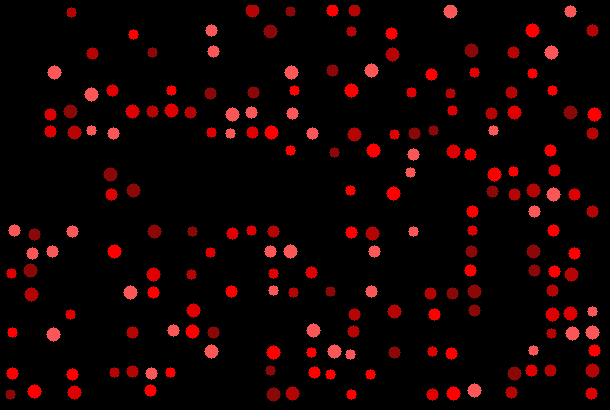

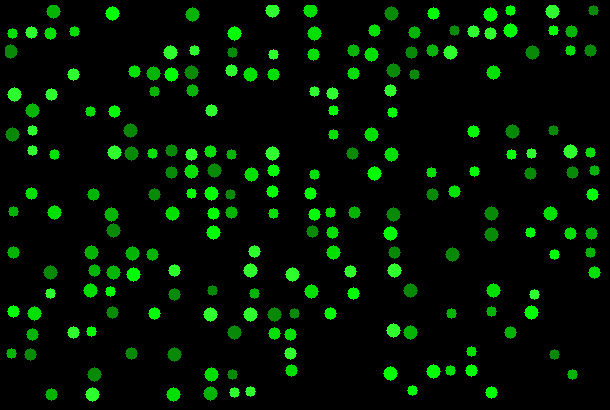

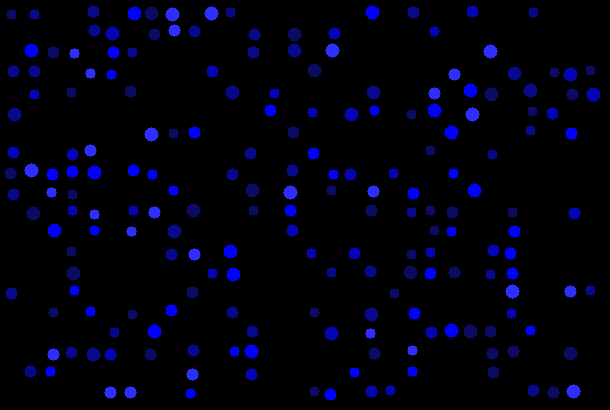

In [ ]:
# We start off by looping over each of the unique cluster labels. Then, for each of the clusters,
# we initialize a mask and grab the indexes of all labels that belong to the current cluster using
# the np.where  function. Now that we have the indexes, we can use them to draw only the
# contours that belong to the current cluster
# loop over the unique cluster identifiers
for i in np.unique(clt.labels_):
	# construct a mask for the current cluster
	mask = np.zeros(canvas.shape[:2], dtype="uint8")

	# loop over the indexes of the current cluster and draw them
	for j in np.where(clt.labels_ == i)[0]:
		cv2.drawContours(mask, [cnts[j]], -1, 255, -1)

	# Last, all we need to do is apply a bitwise AND to display only blobs belonging to the
    # current cluster and hiding all others.
	# show the output image for the cluster
	cv2_imshow(cv2.bitwise_and(canvas, canvas, mask=mask))
	cv2.waitKey(0)
cv2.destroyAllWindows()